In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import pickle

2025-06-02 21:02:33.994199: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 21:02:34.005953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748878354.018466    5288 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748878354.022120    5288 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748878354.031826    5288 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
def load_from_disk(path):

    with open(path, "rb") as f:
        loaded_list = pickle.load(f)

    return loaded_list

In [3]:
vocab=load_from_disk('./Vocabulary/vocab.pkl')

In [4]:
print(len(vocab))
print(vocab[0:10])

400002
['<SOS>', '<EOS>', '!', '!!', '!!!', '!!!!', '!!!!!', '!?', '!?!', '"']


In [25]:
# vectorize_layer = TextVectorization(
#     standardize=None,
#     split=None,
#     output_mode='int',
#     vocabulary=vocab)

vectorize_layer=tf.keras.layers.StringLookup(mask_token='',vocabulary=vocab)

In [26]:
vector_vocab=vectorize_layer.get_vocabulary()
print(len(vector_vocab))
print(vector_vocab[0:10])

400004
['', '[UNK]', '<SOS>', '<EOS>', '!', '!!', '!!!', '!!!!', '!!!!!', '!?']


In [7]:
train_captions=load_from_disk('./Data/train_captions.pkl')

In [8]:
print(len(train_captions))
print(train_captions[0:10])

28320
['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .', 'A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .']


In [9]:
import string

def preprocess_text(text):
    # Step 1: Convert all characters to lowercase
    text = text.lower()
    
    # Step 2: Remove punctuation
    # str.maketrans('', '', string.punctuation) creates a translation table
    # str.translate(...) removes all punctuation characters in that table
    text = text.translate(str.maketrans('', '', string.punctuation))

    text="<SOS> "+text+" <EOS>"
    
    return text

In [10]:
processed_train_captions=[]
for sentence in train_captions:
    sen=preprocess_text(sentence)
    processed_train_captions.append(sen)

In [11]:
print(len(processed_train_captions))
print(processed_train_captions[0:10])

28320
['<SOS> a child in a pink dress is climbing up a set of stairs in an entry way  <EOS>', '<SOS> a girl going into a wooden building  <EOS>', '<SOS> a little girl climbing into a wooden playhouse  <EOS>', '<SOS> a little girl climbing the stairs to her playhouse  <EOS>', '<SOS> a little girl in a pink dress going into a wooden cabin  <EOS>', '<SOS> a black dog and a spotted dog are fighting <EOS>', '<SOS> a black dog and a tricolored dog playing with each other on the road  <EOS>', '<SOS> a black dog and a white dog with brown spots are staring at each other in the street  <EOS>', '<SOS> two dogs of different breeds looking at each other on the road  <EOS>', '<SOS> two dogs on pavement moving toward each other  <EOS>']


In [13]:
split_processed_train_captions=[]
for x in processed_train_captions:
    split=x.split()
    split_processed_train_captions.append(split)
print('completed')

completed


In [14]:
len(split_processed_train_captions)

28320

In [17]:
split_processed_train_captions[0]

['<SOS>',
 'a',
 'child',
 'in',
 'a',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'a',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 '<EOS>']

In [21]:
train_input_captions=[]
train_label_captions=[]
for x in split_processed_train_captions:
    train_input_captions.append(x[0:-1])
    train_label_captions.append(x[1:])

In [23]:
train_input_captions[0:2]

[['<SOS>',
  'a',
  'child',
  'in',
  'a',
  'pink',
  'dress',
  'is',
  'climbing',
  'up',
  'a',
  'set',
  'of',
  'stairs',
  'in',
  'an',
  'entry',
  'way'],
 ['<SOS>', 'a', 'girl', 'going', 'into', 'a', 'wooden', 'building']]

In [28]:
processed_train_input_captions=vectorize_layer(tf.ragged.constant(train_input_captions, dtype=tf.string))
processed_train_label_captions=vectorize_layer(tf.ragged.constant(train_label_captions,dtype=tf.string))

In [29]:
print(type(processed_train_input_captions))

<class 'tensorflow.python.ops.ragged.ragged_tensor.RaggedTensor'>


In [34]:
processed_train_input_captions=processed_train_input_captions.to_tensor()

In [35]:
processed_train_input_captions.shape

TensorShape([28320, 37])

In [36]:
processed_train_label_captions=processed_train_label_captions.to_tensor()

In [37]:
processed_train_label_captions.shape

TensorShape([28320, 37])

In [38]:
processed_train_input_captions[0]

<tf.Tensor: shape=(37,), dtype=int64, numpy=
array([     2,  43013,  98973, 188484,  43013, 285071, 129288, 192976,
       102812, 373320,  43013, 325902, 268049, 341258, 188484,  54276,
       138044, 384125,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0])>

In [39]:
processed_train_label_captions[0]

<tf.Tensor: shape=(37,), dtype=int64, numpy=
array([ 43013,  98973, 188484,  43013, 285071, 129288, 192976, 102812,
       373320,  43013, 325902, 268049, 341258, 188484,  54276, 138044,
       384125,      3,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0])>

In [40]:
processed_train_input_captions_np=processed_train_input_captions.numpy()

In [41]:
type(processed_train_input_captions_np)

numpy.ndarray

In [42]:
processed_train_input_captions_np.shape

(28320, 37)

In [43]:
processed_train_label_captions_np=processed_train_label_captions.numpy()

In [44]:
type(processed_train_label_captions_np)

numpy.ndarray

In [45]:
processed_train_label_captions_np.shape

(28320, 37)

In [46]:
np.save('./Data/processed_train_input_captions.npy',processed_train_input_captions_np)

In [47]:
np.save('./Data/processed_train_label_captions.npy',processed_train_label_captions_np)

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
encoder=ResNet50(include_top=False,
    weights='imagenet',
    input_shape=(224,224,3))

I0000 00:00:1748852684.295468   31925 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
encoder.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
loaded_img_paths=load_from_disk('./Data/train_image_paths.pkl')

In [7]:
loaded_img_paths[0:5]

['1000268201_693b08cb0e.jpg',
 '1000268201_693b08cb0e.jpg',
 '1000268201_693b08cb0e.jpg',
 '1000268201_693b08cb0e.jpg',
 '1000268201_693b08cb0e.jpg']

In [18]:
img = tf.io.read_file(f'./Images/{loaded_img_paths[5]}')
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize_with_pad(img, 224, 224)
img = tf.cast(img, tf.float32)

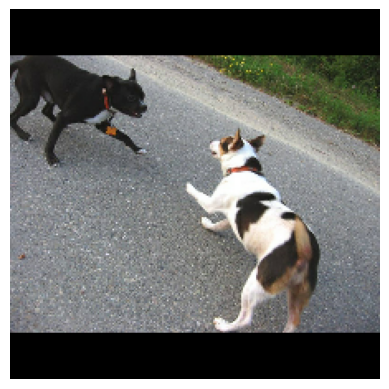

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img.numpy().astype("uint8"))  # if not normalized
# plt.imshow(img.numpy())  # if normalized to [0, 1]
plt.axis('off')  # Hide axes
plt.show()

In [7]:
def load_and_preprocess_image(path):
    path = tf.strings.join(['./Images/', path])
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize_with_pad(img, 224, 224)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # Normalize for ResNet-50
    return img

In [21]:
img=load_and_preprocess_image(loaded_img_paths[5])

In [23]:
img.shape

TensorShape([224, 224, 3])

In [25]:
result=encoder.predict(tf.expand_dims(img, axis=0))

I0000 00:00:1748847945.240744    7026 service.cc:152] XLA service 0x7fb840003ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748847945.240851    7026 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-06-02 12:35:45.346055: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748847946.089085    7026 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


I0000 00:00:1748847951.640849    7026 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [27]:
result.shape

(1, 7, 7, 2048)

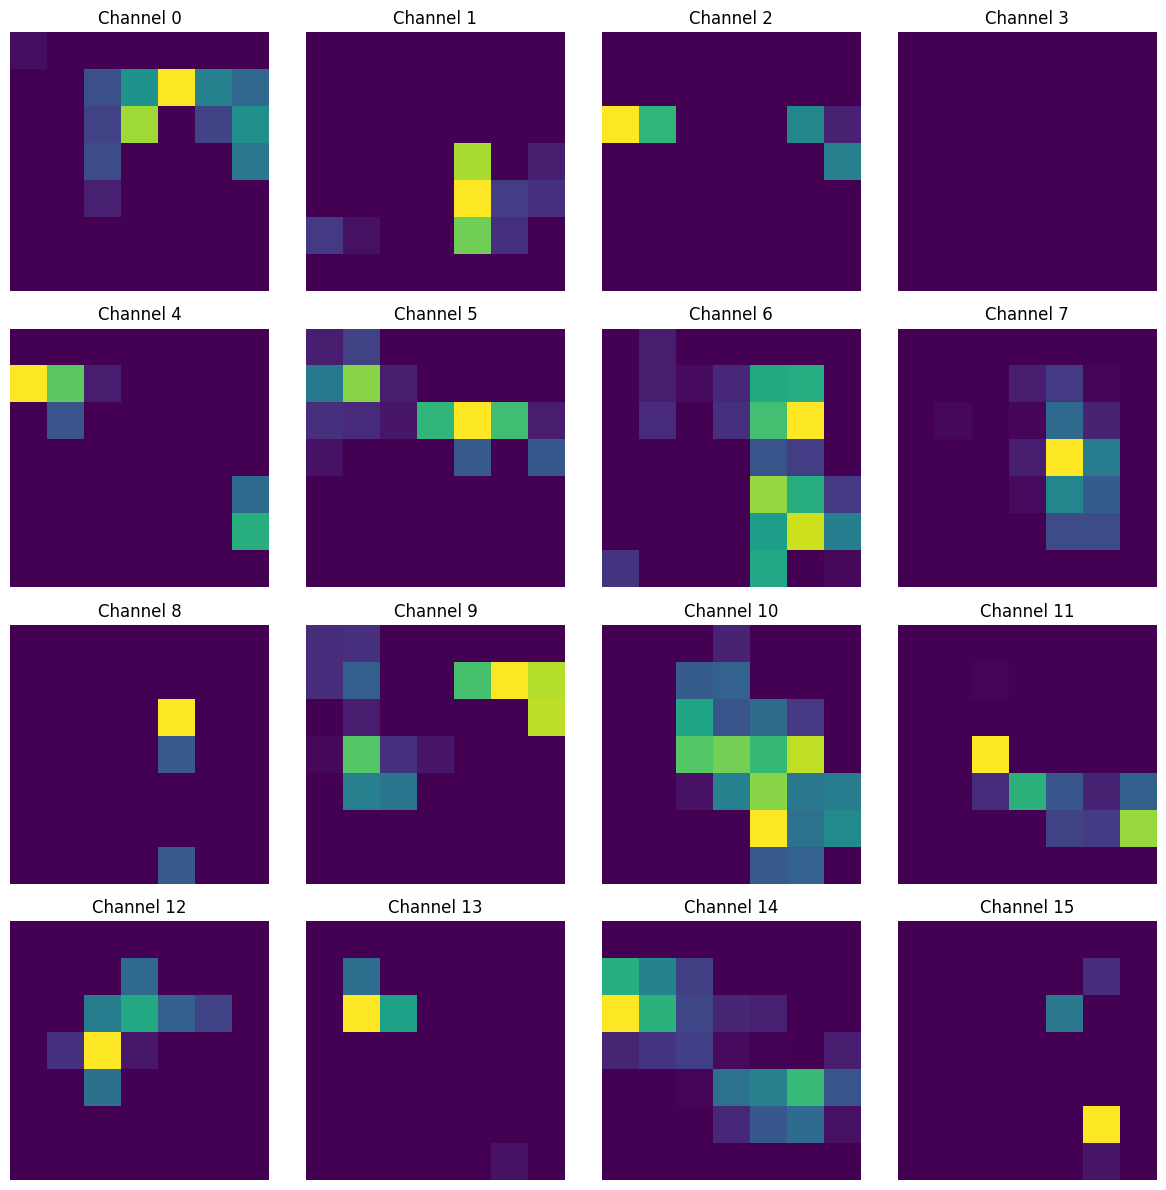

In [28]:
def visualize_feature_maps(feature_map, num_channels=16):
    plt.figure(figsize=(12, 12))
    for i in range(num_channels):
        plt.subplot(4, 4, i+1)
        plt.imshow(feature_map[:, :, i], cmap='viridis')
        plt.axis('off')
        plt.title(f'Channel {i}')
    plt.tight_layout()
    plt.show()

visualize_feature_maps(result[0])

In [29]:
reshaped=result.reshape((-1,49,2048))

In [30]:
reshaped.shape

(1, 49, 2048)

In [31]:
type(reshaped)

numpy.ndarray

In [32]:
type(result)

numpy.ndarray

In [10]:
len(loaded_img_paths)

28320

In [8]:
data_encoder_set=tf.data.Dataset.from_tensor_slices(loaded_img_paths) \
.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE) \
.batch(1)

In [9]:
output_result=encoder.predict(data_encoder_set)

I0000 00:00:1748852756.117218   32112 service.cc:152] XLA service 0x7f1ebc003420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748852756.117273   32112 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-06-02 13:55:56.180314: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748852756.644169   32112 cuda_dnn.cc:529] Loaded cuDNN version 90300


   18/28320 ━━━━━━━━━━━━━━━━━━━━ 4:39 10ms/step  

I0000 00:00:1748852759.210964   32112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 4230/28320 ━━━━━━━━━━━━━━━━━━━━ 3:52 10ms/step

2025-06-02 13:56:50.162261: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 34.87MiB (rounded to 36565248)requested by op 
2025-06-02 13:56:50.162361: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1058] BFCAllocator dump for GPU_0_bfc
2025-06-02 13:56:50.162367: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (256): 	Total Chunks: 69, Chunks in use: 69. 17.2KiB allocated for chunks. 17.2KiB in use in bin. 8.9KiB client-requested in use in bin.
2025-06-02 13:56:50.162370: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (512): 	Total Chunks: 40, Chunks in use: 40. 20.0KiB allocated for chunks. 20.0KiB in use in bin. 20.0KiB client-requested in use in bin.
2025-06-02 13:56:50.162372: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (1024): 	Total Chunks: 81, Chunks in use: 81. 82.5KiB allocated for chunks. 82.5KiB in use in bin. 81.0KiB client-requested in

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/runpy.py", line 198, in _run_module_as_main

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/runpy.py", line 88, in _run_code

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3098, in run_cell

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3153, in _run_cell

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3362, in run_cell_async

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3607, in run_ast_nodes

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3667, in run_code

  File "/tmp/ipykernel_31925/2965970459.py", line 1, in <module>

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 566, in predict

  File "/home/tensor/anaconda3/envs/Image_caption/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 260, in one_step_on_data_distributed

Out of memory while trying to allocate 36565152 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_data_distributed_5173]

In [54]:
output_result.shape

(4, 7, 7, 2048)

In [55]:
type(output_result)

numpy.ndarray

In [12]:
tf.keras.backend.clear_session()

In [5]:
!nvidia-smi

Mon Jun  2 13:37:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.03             Driver Version: 572.60         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8              6W /   74W |    1837MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2025-06-02 13:52:18.102305: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 13:52:18.261055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748852538.319075   31413 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748852538.337223   31413 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748852538.458875   31413 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6184728934731508765
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1853253223
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17486575884602340734
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


I0000 00:00:1748852543.678033   31413 gpu_device.cc:2019] Created device /device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
